# The Inverse Transform

##### Keywords: sampling, inverse transform

In [3]:
import numpy as np
import matplotlib.pyplot as plt


## The idea

By drawing from a uniform distribution, we make it possible to draw from the other distribution in a question.

$$U[0,1]$$ 

## Let us formalize this:

This is the process:

1. get a uniform sample $u$ from $U[0,1]$ -- np.random.rand(1)
1. solve for $x$ yielding a new equation $x=F^{-1}(u)$ where $F$ is the CDF of the distribution we desire. 
1. repeat.

Why does this work?



# Example: Draw from the distribution exponential distribution with parameter 1 

$f(x) \sim \exp{(-x)}$

$\begin{equation}
    f(x)=
    \begin{cases}
       e^{- x}, & \text{if}\ x\geq 0 \\
      0, & \text{otherwise}
    \end{cases}
  \end{equation}$
  

CDF is

$\begin{equation}
    F(x)=
    \begin{cases}
       1 - e^{- x}, & \text{if}\ x\geq 0 \\
      0, & \text{otherwise}
    \end{cases}
  \end{equation}$
### Following the recipe from above

$$ u = F(x) = \int_{0}^{x} e^{-t} dt  = 1- e^{-x} $$ 

Solving for $x$ 
$$ x = - \ln (1-u) $$



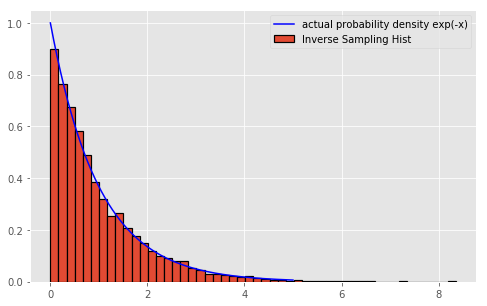

In [7]:

# probability distribution we're trying to calculate
p = lambda x: np.exp(-x)*(x>0)

# CDF of p or exp_cdf(arr,1.)
CDF = lambda x: (1-np.exp(-x))*(x>0)

# invert the CDF
invCDF = lambda u: -np.log(1-u)

# domain limits
#xmin = 0 # the lower limit of our domain
#xmax = 6 # the upper limit of our domain

N = 10000 # the total of samples we wish to generate

# generate uniform samples in our range then invert the CDF
# to get samples of our target distribution
R = np.random.rand(N)#np.random.uniform(rmin, rmax, N)
X = invCDF(R)


# plot the histogram
plt.figure(figsize=(8,5))

plt.hist(X, bins=50,  normed=1, label=u'Inverse Sampling Hist', 
         edgecolor='black', linewidth=1.2);

# plot our (normalized) function
xvals=np.linspace(1e-5, 5, 1000)

plt.plot(xvals, p(xvals), 'b', label=u'actual probability density exp(-x)')
plt.style.use('ggplot')
# turn on the legend
plt.legend()
plt.show()

## From the sampling above, we can also use the sample we generated to plot:  
## Given $A>0$, 
## $P(X<A) = $ {number of samples < A}/total number of samples



In [9]:
# We consider the following array of values a --1000 of them
a = np.linspace(1e-5, 3, 200)

#for each number A in a, 
# we want to calculate the number of samples < A / total number of samples
# store the result in CDFarr

CDFarr = np.zeros(len(a))

for i in range(0,len(a)):
    A = a[i]
    total     = np.sum(X<A)
    prob_A    = total/len(X)
    CDFarr[i] = prob_A
    



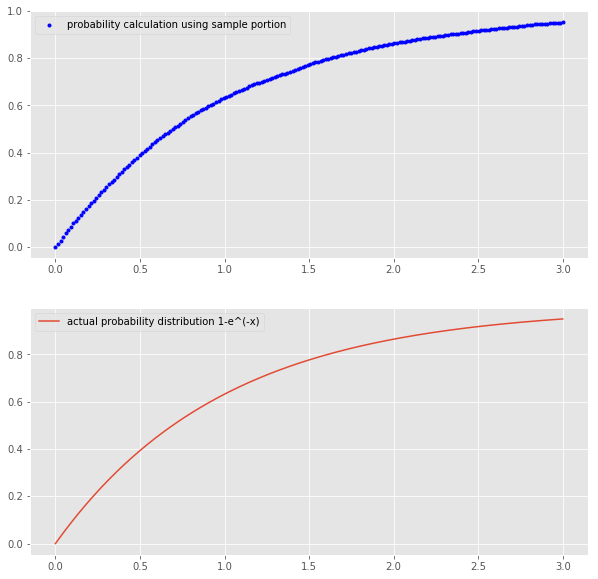

In [10]:

plt.figure(figsize=(10,10))

plt.subplot(211)
plt.plot(a,CDFarr,'.',color = 'blue',
         label = u'probability calculation using sample portion')
plt.legend()

plt.subplot(212)
plt.plot(a,CDF(a),'-',
        label = u'actual probability distribution 1-e^(-x)')
plt.legend()

plt.show()